# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#from scipy.stats import linregress
from scipy import stats
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
np.random.seed(111)
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

<!-- Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).
 -->

In [7]:
# Perform API calls

In [8]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=1ce140a3c50d5a93fdf303c209b63aa3&units=Imperial&q='

In [9]:
# set up lists to hold reponse info
city_name = []
lat = []
lon = []
temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []
num = 0
# Loop through the list of cities and perform a request for data on each
for num, city in enumerate(cities):
    try:
        response = requests.get(query_url + city, time.sleep(1)).json()
        #print(response)
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
       
        
        print(f'Processing record {num} of {len(cities)} complete. | {city}')
    except:
        print('City not found. Skipping...')


Processing record 0 of 632 complete. | khuldabad
Processing record 1 of 632 complete. | albany
Processing record 2 of 632 complete. | soe
Processing record 3 of 632 complete. | atasu
Processing record 4 of 632 complete. | lebu
Processing record 5 of 632 complete. | bredasdorp
Processing record 6 of 632 complete. | hobart
Processing record 7 of 632 complete. | asau
Processing record 8 of 632 complete. | ahipara
Processing record 9 of 632 complete. | khatanga
Processing record 10 of 632 complete. | mataura
Processing record 11 of 632 complete. | bluff
Processing record 12 of 632 complete. | dharchula
Processing record 13 of 632 complete. | arlit
Processing record 14 of 632 complete. | westport
Processing record 15 of 632 complete. | victoria
Processing record 16 of 632 complete. | punta arenas
Processing record 17 of 632 complete. | saskylakh
Processing record 18 of 632 complete. | jasper
City not found. Skipping...
Processing record 20 of 632 complete. | bethel
City not found. Skipping.

Processing record 174 of 632 complete. | charters towers
Processing record 175 of 632 complete. | seminole
Processing record 176 of 632 complete. | tabuk
Processing record 177 of 632 complete. | hami
Processing record 178 of 632 complete. | rio grande
Processing record 179 of 632 complete. | mahebourg
Processing record 180 of 632 complete. | bukama
Processing record 181 of 632 complete. | rzhev
Processing record 182 of 632 complete. | lazaro cardenas
Processing record 183 of 632 complete. | morondava
Processing record 184 of 632 complete. | novikovo
Processing record 185 of 632 complete. | mino
City not found. Skipping...
Processing record 187 of 632 complete. | comodoro rivadavia
Processing record 188 of 632 complete. | zhangjiakou
Processing record 189 of 632 complete. | mollendo
Processing record 190 of 632 complete. | sortavala
Processing record 191 of 632 complete. | lima
Processing record 192 of 632 complete. | faanui
Processing record 193 of 632 complete. | calama
Processing rec

Processing record 342 of 632 complete. | olafsvik
Processing record 343 of 632 complete. | petropavlovsk-kamchatskiy
Processing record 344 of 632 complete. | fethiye
Processing record 345 of 632 complete. | conceicao da barra
Processing record 346 of 632 complete. | bongandanga
City not found. Skipping...
Processing record 348 of 632 complete. | cabo san lucas
City not found. Skipping...
Processing record 350 of 632 complete. | vitim
Processing record 351 of 632 complete. | karratha
Processing record 352 of 632 complete. | turukhansk
City not found. Skipping...
Processing record 354 of 632 complete. | los llanos de aridane
Processing record 355 of 632 complete. | baghmara
Processing record 356 of 632 complete. | mpika
Processing record 357 of 632 complete. | aklavik
Processing record 358 of 632 complete. | nanma
Processing record 359 of 632 complete. | ceres
Processing record 360 of 632 complete. | paamiut
Processing record 361 of 632 complete. | grand falls
Processing record 362 of 63

Processing record 510 of 632 complete. | oistins
Processing record 511 of 632 complete. | pilar
Processing record 512 of 632 complete. | saint-augustin
Processing record 513 of 632 complete. | okha
Processing record 514 of 632 complete. | talnakh
Processing record 515 of 632 complete. | vao
Processing record 516 of 632 complete. | alta floresta
Processing record 517 of 632 complete. | saint-leu
Processing record 518 of 632 complete. | guerrero negro
Processing record 519 of 632 complete. | beringovskiy
Processing record 520 of 632 complete. | sangar
Processing record 521 of 632 complete. | kushmurun
Processing record 522 of 632 complete. | niamey
Processing record 523 of 632 complete. | matara
Processing record 524 of 632 complete. | oum hadjer
Processing record 525 of 632 complete. | cayenne
Processing record 526 of 632 complete. | poltavka
Processing record 527 of 632 complete. | horasan
Processing record 528 of 632 complete. | saldanha
Processing record 529 of 632 complete. | salino

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": city_name,
    "lat": lat,
    "lon": lon,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "windspeed": windspeed,
    "country": country,
    "date": date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,lon,temp,humidity,cloudiness,windspeed,country,date
0,Khuldābād,20.0500,75.1833,55.40,58,67,7.25,IN,1612736555
1,Albany,42.6001,-73.9662,28.99,64,100,5.01,US,1612736482
2,Soe,-9.8607,124.2840,66.02,100,100,3.83,ID,1612736557
3,Atasū,48.6814,71.6433,26.96,95,100,16.28,KZ,1612736558
4,Lebu,-37.6167,-73.6500,61.57,84,51,5.35,CL,1612736470


In [14]:
# export dataframe into csv
weather_data.to_csv("output_data_file", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
#  Check to see if there are cities with humidity over 100%.
max_hum = weather_data['humidity'].max()
max_hum

100

In [ ]:
# for weather in weather_data:
#     if humidity > 100
    
    

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

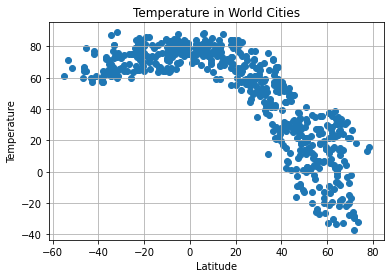

In [17]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.grid(True)


## Latitude vs. Humidity Plot

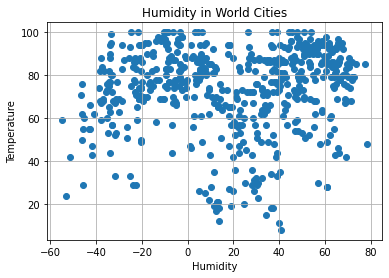

In [18]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Temperature")
plt.xlabel("Humidity")
plt.grid(True)


## Latitude vs. Cloudiness Plot

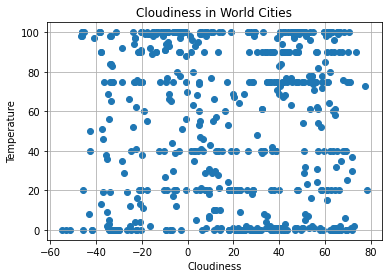

In [19]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Temperature")
plt.xlabel("Cloudiness")
plt.grid(True)


## Latitude vs. Wind Speed Plot

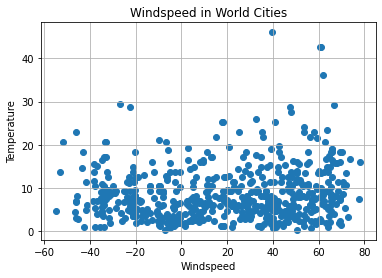

In [20]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("Windspeed in World Cities")
plt.ylabel("Temperature")
plt.xlabel("Windspeed")
plt.grid(True)


## Linear Regression

In [21]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_data["lat"], weather_data["temp"])

# Get regression values
regress_values = weather_data["lat"] * slope + intercept
print(regress_values)

0      49.260387
1      32.820154
2      71.066893
3      28.386560
4      91.302507
         ...    
579    58.872085
580    29.479630
581    40.329917
582    86.476900
583    40.451013
Name: lat, Length: 584, dtype: float64


In [22]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.73x +63.88


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [23]:
# Create Northern and Southern Hemisphere DataFrames
nor_hem = weather_data.loc[weather_data["lat"] >= 0]
so_hem = weather_data.loc[weather_data["lat"] < 0]
nor_hem.head()

,city,lat,lon,temp,humidity,cloudiness,windspeed,country,date
0,Khuldābād,20.0500,75.1833,55.40,58,67,7.25,IN,1612736555
1,Albany,42.6001,-73.9662,28.99,64,100,5.01,US,1612736482
3,Atasū,48.6814,71.6433,26.96,95,100,16.28,KZ,1612736558
7,Asău,46.4333,26.4000,30.00,73,97,2.24,RO,1612736522
9,Khatanga,71.9667,102.5000,-29.72,79,0,10.65,RU,1612736565


The r-value is: 0.6065270575458089


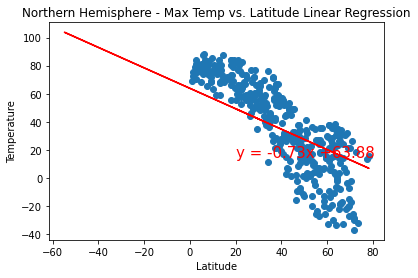

In [25]:
# Create Plot
plt.scatter(nor_hem['lat'],nor_hem['temp'])
plt.plot(lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6065270575458089


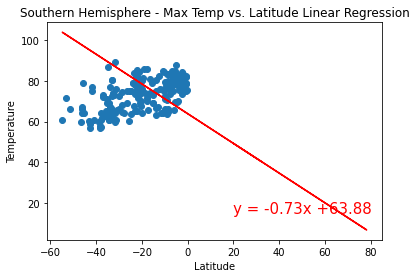

In [26]:
# Create Plot
plt.scatter(so_hem['lat'],so_hem['temp'])
plt.plot(lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [27]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_data["lat"], weather_data["humidity"])

# Get regression values
regress_values = weather_data["lat"] * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

The r-value is: 0.008295316373052848


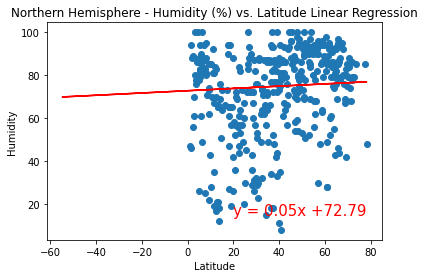

In [28]:
# Create Plot
plt.scatter(nor_hem['lat'],nor_hem['humidity'])
plt.plot(lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.008295316373052848


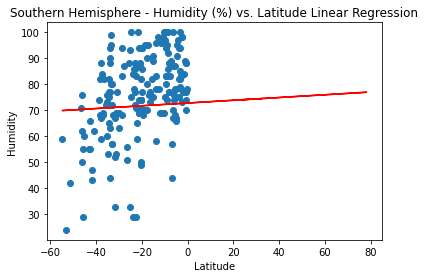

In [29]:
# Create Plot
plt.scatter(so_hem['lat'],so_hem['humidity'])
plt.plot(lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [30]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_data["lat"], weather_data["cloudiness"])

# Get regression values
regress_values = weather_data["lat"] * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

The r-value is: 0.00017752148810311469


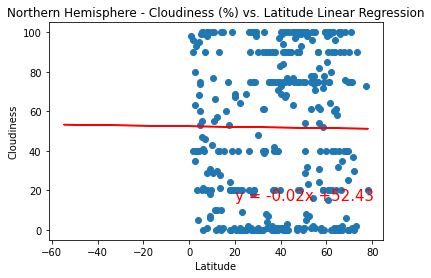

In [31]:
# Create Plot
plt.scatter(nor_hem['lat'],nor_hem['cloudiness'])
plt.plot(lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.00017752148810311469


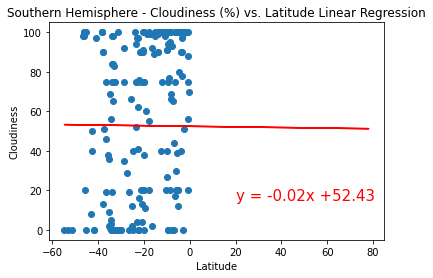

In [32]:
# Create Plot
plt.scatter(so_hem['lat'],so_hem['cloudiness'])
plt.plot(lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [33]:
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weather_data["lat"], weather_data["windspeed"])

# Get regression values
regress_values = weather_data["lat"] * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

The r-value is: 0.017353388244983416


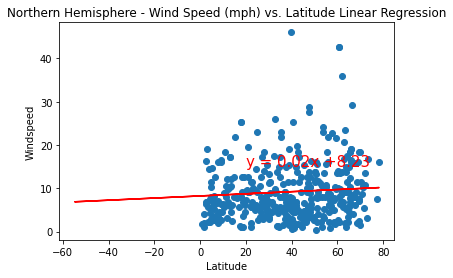

In [34]:
# Create Plot
plt.scatter(nor_hem['lat'],nor_hem['windspeed'])
plt.plot(lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017353388244983416


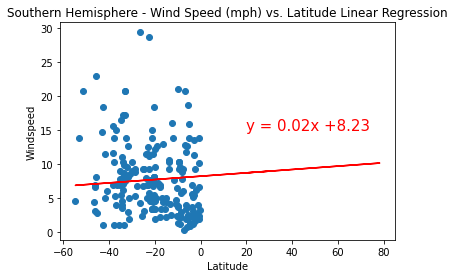

In [35]:
# Create Plot
plt.scatter(so_hem['lat'],so_hem['windspeed'])
plt.plot(lat,regress_values,"r-")

# Label plot and annotate the line equation
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()